In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [3]:
def sequence_to_onehot(_datax):
  res_list = []
  for i in range(len(_datax)):
    tmp =list()
    mapping = {"A":[1., 0., 0., 0.], "C": [0., 1., 0., 0.], "G": [1., 0., 0., 0.], "T":[0., 0., 0., 1.]}
    for j in _datax[i]:
      tmp.append(mapping[j]  if i in mapping.keys() else [0., 0., 0., 0.]) 
    res_list.append(np.array(tmp))
  res_np = np.array(res_list)
  return res_np

In [4]:
# data shuffle
df_shuffled = pd.read_csv('data.csv').sample(frac=1).reset_index(drop=True)

# x, y 분류. numpy로 변환 후 1차원으로 reshape, sequence onehot encoding
datax = sequence_to_onehot(df_shuffled.iloc[:,[0,]].to_numpy().reshape(-1))
datay = df_shuffled.iloc[:,[2,]].to_numpy().reshape(-1)


In [5]:
print(datax.shape)

(242, 5600, 4)


In [6]:
# Train, Test Split 
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size = 0.3, random_state =111)

print(f"Train = {trnx.shape[0]}개, Test = {tstx.shape[0]}개")
print(f"trnx.shape = {trnx.shape}")
print(f"tstx.shape = {tstx.shape}")
print(f"trny.shape = {trny.shape}")
print(f"tsty.shape = {tsty.shape}")



Train = 169개, Test = 73개
trnx.shape = (169, 5600, 4)
tstx.shape = (73, 5600, 4)
trny.shape = (169,)
tsty.shape = (73,)


In [10]:
input_shape = (5600,4,1)
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(16,(2,2), padding='same', input_shape=input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(16,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 128, activation = "relu"))
cnn_model.add(layers.Dense(units = 1, activation = "softmax"))

cnn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 5600, 4, 16)       80        
                                                                 
 batch_normalization_2 (Batc  (None, 5600, 4, 16)      64        
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 5600, 4, 16)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2800, 2, 16)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2800, 2, 16)       1040      
                                                                 
 batch_normalization_3 (Batc  (None, 2800, 2, 16)     

In [11]:
histroy = cnn_model.fit(trnx.reshape(-1,5600,4,1), trny, validation_data = [tstx.reshape(-1,5600,4,1),tsty], batch_size = 100, epochs = 100)

Epoch 1/100
2/2 [==============================] - 5s 3s/step - loss: 0.0000e+00 - accuracy: 0.5266 - val_loss: 0.0000e+00 - val_accuracy: 0.4521
Epoch 2/100
2/2 [==============================] - 5s 2s/step - loss: 0.0000e+00 - accuracy: 0.5266 - val_loss: 0.0000e+00 - val_accuracy: 0.4521
Epoch 3/100
2/2 [==============================] - 3s 1s/step - loss: 0.0000e+00 - accuracy: 0.5266 - val_loss: 0.0000e+00 - val_accuracy: 0.4521
Epoch 4/100
2/2 [==============================] - 3s 1s/step - loss: 0.0000e+00 - accuracy: 0.5266 - val_loss: 0.0000e+00 - val_accuracy: 0.4521
Epoch 5/100
2/2 [==============================] - 3s 1s/step - loss: 0.0000e+00 - accuracy: 0.5266 - val_loss: 0.0000e+00 - val_accuracy: 0.4521
Epoch 6/100
2/2 [==============================] - 3s 1s/step - loss: 0.0000e+00 - accuracy: 0.5266 - val_loss: 0.0000e+00 - val_accuracy: 0.4521
Epoch 7/100
2/2 [==============================] - 3s 1s/step - loss: 0.0000e+00 - accuracy: 0.5266 - val_loss: 0.0000e+00 -

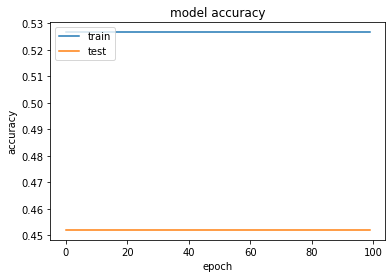

In [13]:
# Model Performance (Measurement = Accuracy)
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()
